In [249]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt


1(a)

In [250]:
import pandas as pd
import numpy as np

# Load the spin configurations for each system size
L6 = pd.read_csv("F_conf_L6.csv", header=None).to_numpy()
L8 = pd.read_csv("F_conf_L8.csv", header=None).to_numpy()
L10 = pd.read_csv("F_conf_L10.csv", header=None).to_numpy()

# Load the temperatures
t = pd.read_csv("F_temp.csv", header=None).to_numpy().T

t = np.unique(t)[::-1]




In [251]:
def mag(L):
  m=[]
  for k in range(10):
    m_=[]
    for j in range(16):
      m__=0
      for i in range(25):
        m__+=np.abs(np.sum(L[400*k+25*j+i]))/len(L[400*k+25*j+i])
      m__/=25
      m_.append(m__)
    m.append(m_)
  mag=np.sum(m,axis=0)/10
  return mag

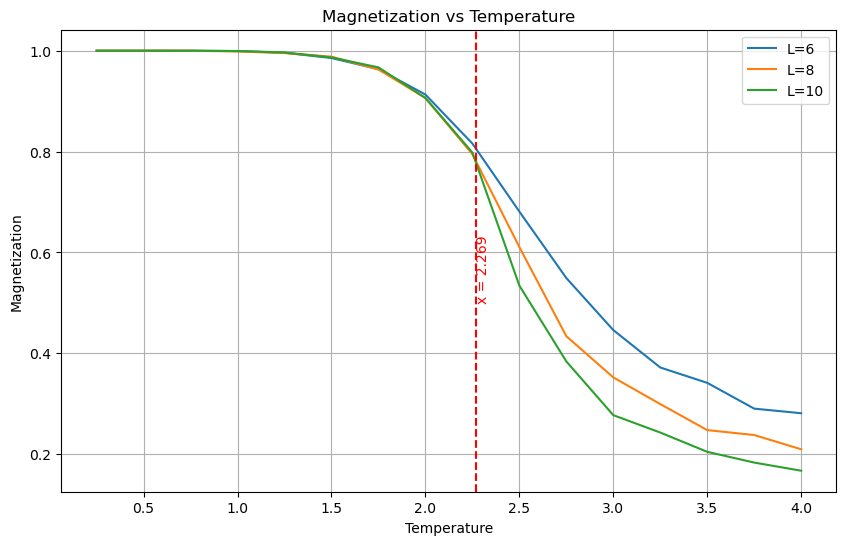

In [252]:
import matplotlib.pyplot as plt

# Calculate magnetization for each system size
mag_L6 = mag(L6)
mag_L8 = mag(L8)
mag_L10 = mag(L10)

# Plot magnetization vs temperature for each system size
plt.figure(figsize=(10,6))
plt.plot(t, mag_L6, label='L=6')
plt.plot(t, mag_L8, label='L=8')
plt.plot(t, mag_L10, label='L=10')

# Add a vertical line at x=2.269
plt.axvline(x=2.269, color='r', linestyle='--')

# Label the line
plt.text(2.269, 0.5, 'x = 2.269', rotation=90, verticalalignment='bottom', color='r')

plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

As the system sizes grow larger, the decline in the slope of the larger system size becomes remarkably pronounced.
Consequently, when we compare it to the theoretical prediction at $T_c$, we observe that as the system size increases, it gradually converges towards to the theoretical value.

2(a)

In [253]:
# spin configurations
df1 = pd.read_csv("AF_conf.csv",header=None)
# temperature
df2 = pd.read_csv("AF_temp.csv",header=None)
df1 = df1.to_numpy()
df2 = df2.to_numpy()
x = df1
t = df2
t_1 = t.T
print(x)
print(x.shape)
print(t.shape)

[[ 1  1  1 ... -1  1 -1]
 [-1  1 -1 ...  1 -1  1]
 [-1  1  1 ... -1  1 -1]
 ...
 [ 1 -1  1 ...  1 -1  1]
 [ 1 -1  1 ...  1 -1  1]
 [ 1 -1  1 ...  1 -1  1]]
(4800, 100)
(4800, 1)


In [254]:
z = np.zeros((4800,100))
x_mean = np.mean(x,axis=0)
x_var = np.var(x,axis=0)
x_std = np.std(x,axis=0,ddof=0)
print(x_mean.shape,x_std.shape)
for i in range(100):
  z[:,i]=(x_mean[i]-x[:,i])/x_std[i]

print(z)
print(z.shape)

(100,) (100,)
[[-0.84225988 -1.21470278 -0.83038903 ...  1.18321596 -1.17614488
   1.17162869]
 [ 1.187282   -1.21470278  1.20425484 ... -0.84515425  0.85023539
  -0.85351273]
 [ 1.187282   -1.21470278 -0.83038903 ...  1.18321596 -1.17614488
   1.17162869]
 ...
 [-0.84225988  0.82324666 -0.83038903 ... -0.84515425  0.85023539
  -0.85351273]
 [-0.84225988  0.82324666 -0.83038903 ... -0.84515425  0.85023539
  -0.85351273]
 [-0.84225988  0.82324666 -0.83038903 ... -0.84515425  0.85023539
  -0.85351273]]
(4800, 100)


In [255]:
cov = np.cov(z,rowvar=False)
print(cov.shape)
print(cov)

(100, 100)
[[ 1.00020838 -0.69752257  0.60750464 ...  0.54728705 -0.57090826
   0.63073777]
 [-0.69752257  1.00020838 -0.71511433 ... -0.55048738  0.5519649
  -0.57430079]
 [ 0.60750464 -0.71511433  1.00020838 ...  0.54328802 -0.53612791
   0.56527334]
 ...
 [ 0.54728705 -0.55048738  0.54328802 ...  1.00020838 -0.69788877
   0.59838511]
 [-0.57090826  0.5519649  -0.53612791 ... -0.69788877  1.00020838
  -0.71417913]
 [ 0.63073777 -0.57430079  0.56527334 ...  0.59838511 -0.71417913
   1.00020838]]


In [256]:
from numpy import linalg as la
U,sigma,VT=la.svd(cov)
# sigma is eigenvalue, U is eigenvector
print(sigma)
print(U.shape)

[56.36320651  1.93442045  1.902633    1.8442736   1.75613145  1.27830655
  1.23039768  1.15687839  1.15229018  0.81111605  0.80653378  0.78746568
  0.72000322  0.71072929  0.67281624  0.66493788  0.66141114  0.63598458
  0.62147869  0.60850735  0.5886821   0.50540468  0.49652849  0.49041981
  0.48143098  0.47582962  0.46814252  0.45901345  0.44104492  0.43061555
  0.42417046  0.42039154  0.41452162  0.40606489  0.40383453  0.39522402
  0.39290331  0.38048528  0.37473007  0.35876174  0.35676184  0.35516741
  0.34991793  0.34670668  0.34109705  0.3392846   0.33316033  0.33080584
  0.32954632  0.32281993  0.32190528  0.31401134  0.31080247  0.30748614
  0.30547115  0.30383348  0.29750606  0.29434633  0.28604013  0.28390309
  0.28045877  0.27290092  0.26926664  0.26708224  0.26224187  0.25591186
  0.25413166  0.25358634  0.25019345  0.24800199  0.24470355  0.2397988
  0.23626035  0.23522268  0.22789616  0.22662844  0.22144595  0.21780715
  0.2149251   0.21294746  0.20985362  0.20741391  0.

Text(0.5, 1.0, 'Eigenvalue of covarance matrix')

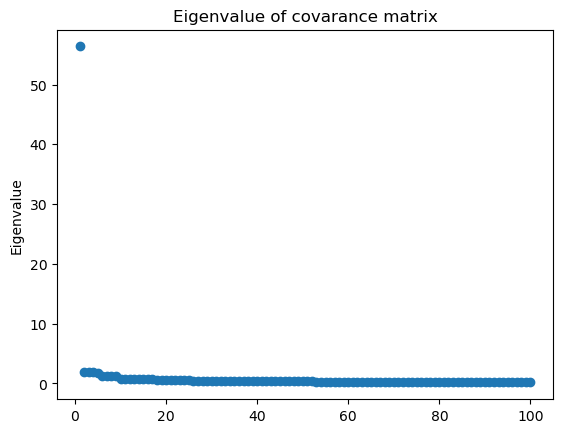

In [257]:
n = []
for i in range(1,101):
  n.append(i)
plt.scatter(n[0:100],sigma[0:100])
plt.ylabel("Eigenvalue")
plt.title("Eigenvalue of covarance matrix")

In [258]:
def reduce_system(U,dimension):
    U_reduced=U[ : , :dimension]
    reduced_vec=np.dot(z,U_reduced)
    var=np.sum(sigma[:dimension])/np.sum(sigma[:])
    return reduced_vec,var

[[ 3.11324412e+00 -5.01557622e-01  2.31839543e+00]
 [-1.97546687e+00 -1.55330354e+00 -1.15940737e+00]
 [-3.98984521e+00  1.19800430e+00 -3.31378779e+00]
 ...
 [ 8.38991232e+00 -6.95195284e-03 -5.27614401e-03]
 [ 8.38991232e+00 -6.95195284e-03 -5.27614401e-03]
 [ 8.38991232e+00 -6.95195284e-03 -5.27614401e-03]]


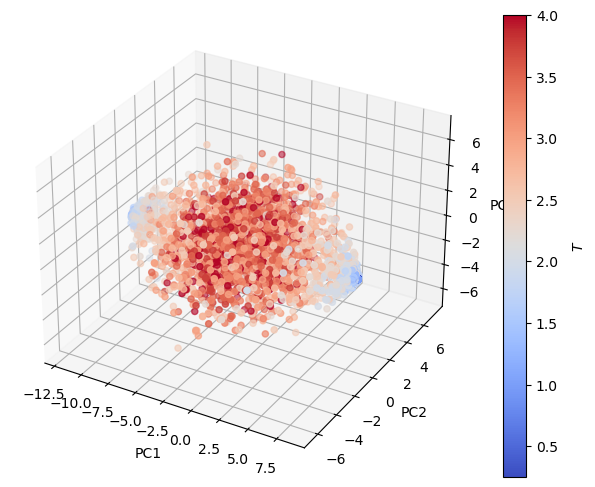

In [259]:
from mpl_toolkits.mplot3d import Axes3D

reducevec, vari = reduce_system(U,3)
print(reducevec)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(reducevec[:,0], reducevec[:,1], reducevec[:,2], c=t_1, cmap="coolwarm")

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

cb = plt.colorbar(sc)
cb.set_label(label='$T$',labelpad=10)

plt.show()

2(b)

In [260]:
pc = reducevec
tc = t_1
tc = tc.T


In [261]:
import random
K=3
a = random.sample(range(0, len(pc)-1), K)
Centroids = np.zeros((K,3))

pc = pc.tolist()
Centroids = Centroids.tolist()
principalComponents = pd.DataFrame(pc)
Centroids = pd.DataFrame(Centroids)
print(principalComponents)
print(Centroids)

             0         1         2
0     3.113244 -0.501558  2.318395
1    -1.975467 -1.553304 -1.159407
2    -3.989845  1.198004 -3.313788
3    -2.389187  3.466549  1.175701
4    -2.369332 -0.599262 -0.154364
...        ...       ...       ...
4795  8.389912 -0.006952 -0.005276
4796  8.389912 -0.006952 -0.005276
4797  8.389912 -0.006952 -0.005276
4798  8.389912 -0.006952 -0.005276
4799  8.389912 -0.006952 -0.005276

[4800 rows x 3 columns]
     0    1    2
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0


In [262]:
import random
import numpy as np
import pandas as pd

def K_mean(pc, K=3, jmax=10):
    # step 1 - choose 3 clusters at random
    # step 2 - select random point as centroids
    a = random.sample(range(0, len(pc)-1), K)
    Centroids = np.zeros((K,3))
    for i in range(K):
        Centroids[i,0] = pc[a[i]][0]
        Centroids[i,1] = pc[a[i]][1]
        Centroids[i,2] = pc[a[i]][2]
    diff = 1
    j = 0
    Centroids = pd.DataFrame(Centroids)
    Centroids.columns = ['pc1','pc2', 'pc3']
    principalComponents = pd.DataFrame(pc)
    principalComponents.columns = ['pc1','pc2', 'pc3']
    while (diff!=0):
        XD = principalComponents
        i = 1
        # step 3 - assign all the points to the closest cluster centroid
        for index1,row_c in Centroids.iterrows():
            ED = []
            for index2,row_d in XD.iterrows():
                d1 = (row_c["pc1"] - row_d["pc1"])**2
                d2 = (row_c["pc2"] - row_d["pc2"])**2
                d3 = (row_c["pc3"] - row_d["pc3"])**2
                d = np.sqrt(d1+d2+d3)
                ED.append(d)
            principalComponents[i] = ED
            i = i + 1

        C=[]
        for index,row in principalComponents.iterrows():
            min_dist = row[1]
            pos = 1
            for i in range(K):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos = i + 1
            C.append(pos)
        principalComponents["Cluster"]=C
        # step 4 - recomput centroids of newly formed clusters
        Centroids_new = principalComponents.groupby(["Cluster"]).mean()[["pc1","pc2","pc3"]]
        # step 5 - repeat 3 and 4
        if j == 0:
            diff = 1
            j = j+1
        elif j<jmax:
            diff = ((Centroids_new['pc1'] - Centroids['pc1'])**2).sum() + ((Centroids_new['pc2'] - Centroids['pc2'])**2).sum() + ((Centroids_new['pc3'] - Centroids['pc3'])**2).sum()
            print(diff.sum())
            j = j+1
        else:
            diff = ((Centroids_new['pc1'] - Centroids['pc1'])**2).sum() + ((Centroids_new['pc2'] - Centroids['pc2'])**2).sum() + ((Centroids_new['pc3'] - Centroids['pc3'])**2).sum()
            print('force exit with diff=', diff.sum())
            diff=0
        Centroids = principalComponents.groupby(["Cluster"]).mean()[["pc1","pc2","pc3"]]
    return principalComponents, Centroids

In [263]:
principalComponents, Centroids=K_mean(pc,3)

6.390734107317704
3.0474963057837114
1.2793282177903997
0.43210922951719305
0.1163111315276314
0.023517394689914407
0.005822161508059523
9.323112234202315e-05
0.0


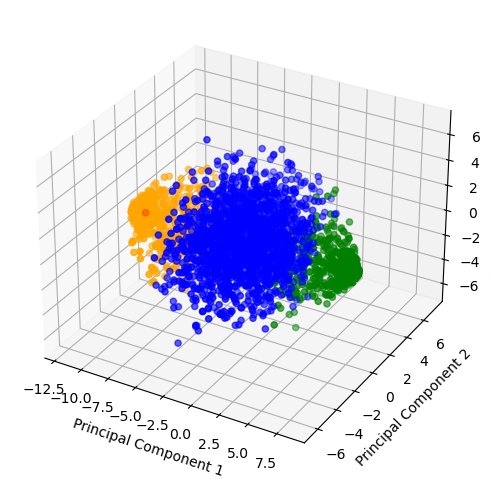

In [264]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

color=['blue','orange','green']
for k in range(K):
    data=principalComponents[principalComponents["Cluster"]==k+1]
    ax.scatter(data["pc1"],data["pc2"],data["pc3"],c=color[k])
ax.scatter(Centroids["pc1"],Centroids["pc2"],Centroids["pc3"],c='red')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

2(c)

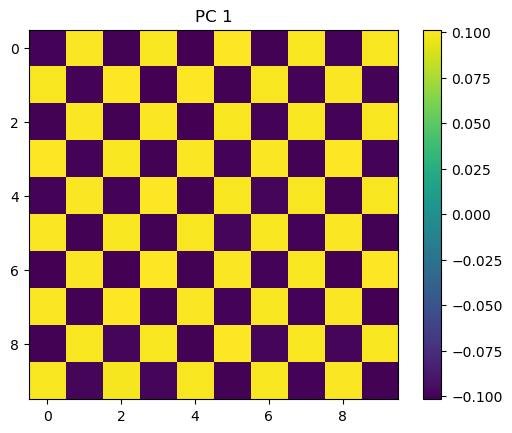

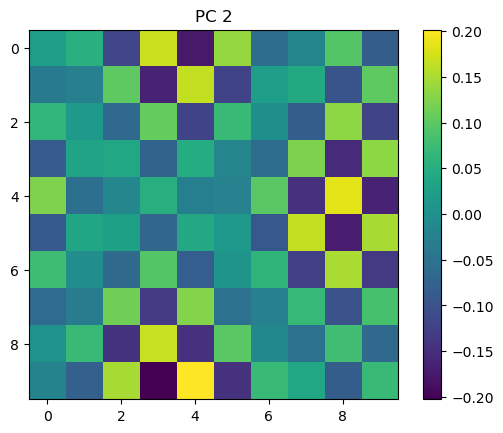

In [272]:
import numpy as np

# Assuming reducevec is your array containing the eigenvectors
# Reshape the eigenvectors into 60x80 arrays
#print(U[:,0])
eigenvector1 = U[:,0].reshape(10,10)

eigenvector2 = U[:,1].reshape(10,10)

# Create a figure and subplot for the first eigenvector
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
axmap1 = eigenvector1
A1 = ax1.imshow(axmap1)
ax1.set_title('PC 1')
fig1.colorbar(A1, ax=ax1)

# Create a figure and subplot for the second eigenvector
fig2, ax2 = plt.subplots(nrows=1, ncols=1)
axmap2 = eigenvector2
A2 = ax2.imshow(axmap2)
ax2.set_title('PC 2')
fig2.colorbar(A2, ax=ax2)

# Display the figures
plt.show()

The PCA indicates the important feature of the lattice configurations. For the PC1, it shows checkerboard like shape, so, it suggests that it is most the spin configuration are in anti-ferromagnetic order.